# Regresiones

Una regresión es una técnica estadística utilizada para analizar la relación entre una variable dependiente y una o más variables independientes. El objetivo principal de la regresión es predecir o estimar el valor de la variable dependiente a partir de los valores de las variables independientes, así como entender cómo estas variables se relacionan entre sí.

## Regresion Lineal

* Aprendizaje supervisado
* Aprendizaje basado en modelos
* Se corresponde con modelo lineal 
* Realiza predicciones computando una *suma ponerada de las caracteristicas de entrada* y sumandole una constante conocida como _BIAS_
* Intenta predecir *valores continuos*

**Ejemplo de regresion lineal**

Supongamos que queremos predecir el precio de una casa en función de su tamaño (en metros cuadrados).  
La relación entre el precio (Y) y el tamaño (X) se puede expresar mediante la siguiente ecuación de regresión lineal:

**Y = wX + b**

Donde:  
- **Y**: Precio de la casa  
- **X**: Tamaño de la casa  
- **w**: Peso o coeficiente que representa cuánto aumenta el precio por cada metro cuadrado adicional  
- **b**: Bias o término independiente que representa el precio base de la casa

Por ejemplo, si **w = 1500** y **b = 50,000**, entonces para una casa de 100 m²:

**Y = 1500 × 100 + 50,000 = 200,000**

Así, el modelo predice que una casa de 100 m² costaría $200,000.

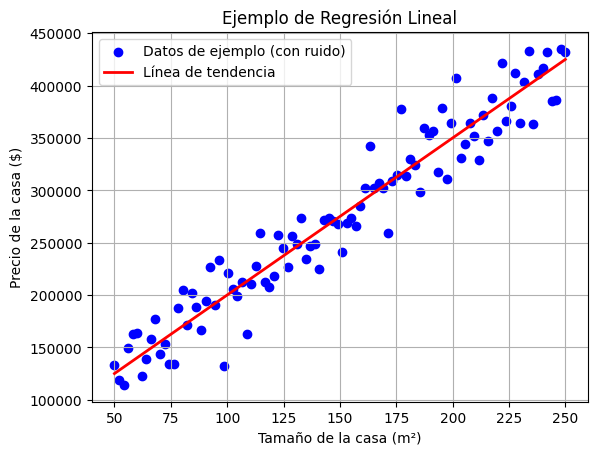

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Parámetros para la línea de tendencia (puedes cambiarlos)
w = 1500  # Pendiente (weight)
b = 50000 # Intercepto (bias)

# 2. Generar datos para el eje X (variable independiente)
# Creamos 100 puntos entre 50 y 250 (ej. metros cuadrados de una casa)
X = np.linspace(50, 250, 100)

# 3. Generar los datos para el eje Y (variable dependiente) con ruido aleatorio
# Esto crea la nube de puntos que simula datos reales.
# El ruido se genera con np.random.normal()
Y_puntos = w * X + b + np.random.normal(0, 25000, size=X.shape)

# 4. Calcular la línea de tendencia ideal (sin ruido)
Y_linea = w * X + b

# 5. Crear el gráfico
# Dibuja la nube de puntos
plt.scatter(X, Y_puntos, color='blue', label='Datos de ejemplo (con ruido)')

# Dibuja la línea de tendencia
plt.plot(X, Y_linea, color='red', linewidth=2, label='Línea de tendencia')

# 6. Añadir etiquetas y título para que el gráfico se entienda
plt.xlabel('Tamaño de la casa (m²)')
plt.ylabel('Precio de la casa ($)')
plt.title('Ejemplo de Regresión Lineal')
plt.legend()
plt.grid(True)
plt.show()

Features, Target values y Dataset.

X = variables de entrada 
y = variables de salida
(x,y) = ejemplo de entrenamiento

### **REGRESION LINEAL | FUNCION HIPOTESIS**

$$ Conjunto de adtos -> Funcion hipotesis -> Modelo -> Predicciones $$
$$ h_{\theta}(x) = \theta_{0} + \theta_{1}x $$
$$ y = mx + b $$

Esta es una funcion generica con multiples posibilidadesd tantas como sean posibles, y para ello se guia de los parametros del modelo.

$\theta_{0}$ : La pendiente
$\theta_{1}$ : Corte con el eje y

La idea es ajustar esta recta que haga que la recta sea la correcta que tienda a los datos. Region lineal univariable solo 1 x, pero si es Region lineal multivariable de $X_n$ pues seria:

$$ h_{\theta}(x) = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + ... \theta_{n}x_{n} $$

### **REGRESION LINEAL | CONSTRUCCION MODELO**

La idea es buscar los valores de $\theta_{0}$ y de $\theta_{1}$ que generen la funcion hipotes que mejor adapte al conjunto de datos de entrenamiento (x,y).

Y como hay muchas posibilidades entonces se genera un error y para mejorar esta prediccion se usa la funcion de error o de coste para obtener los valores $\theta$ optimos. Despues se vera una funcion de optimizacion. Cuando ya este al minimo posible de ajuste entonces ya se abra llegado al limite y despues se ajusta con la funcion de optimizacion. Esto se llama entreno de algoritmo de Machine Learning de forma supervisada etiquetando los valores de entrada y salida.

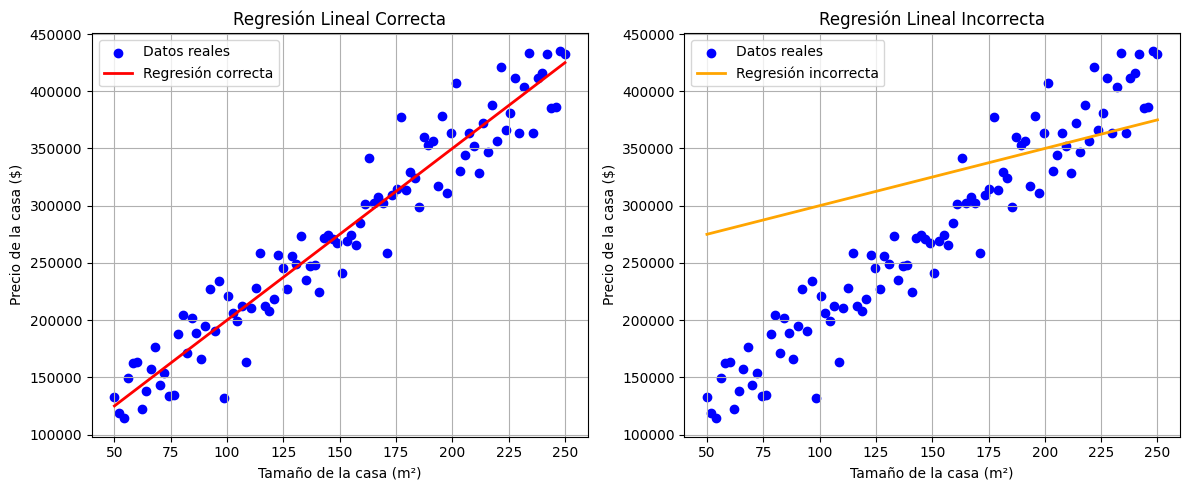

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Imagen 1: Regresión correcta (línea ajustada a los datos)
axs[0].scatter(X, Y_puntos, color='blue', label='Datos reales')
axs[0].plot(X, Y_linea, color='red', linewidth=2, label='Regresión correcta')
axs[0].set_title('Regresión Lineal Correcta')
axs[0].set_xlabel('Tamaño de la casa (m²)')
axs[0].set_ylabel('Precio de la casa ($)')
axs[0].legend()
axs[0].grid(True)

# Imagen 2: Regresión incorrecta (línea con mucho error)
# Creamos una línea con parámetros erróneos
w_mal = 500   # Pendiente incorrecta
b_mal = 250000 # Intercepto incorrecto
Y_linea_mal = w_mal * X + b_mal

axs[1].scatter(X, Y_puntos, color='blue', label='Datos reales')
axs[1].plot(X, Y_linea_mal, color='orange', linewidth=2, label='Regresión incorrecta')
axs[1].set_title('Regresión Lineal Incorrecta')
axs[1].set_xlabel('Tamaño de la casa (m²)')
axs[1].set_ylabel('Precio de la casa ($)')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

### **REGRESION LINEAL | FUNCION DE COSTE**

Las funciones de coste pueden variar porque pueden ejecutarse varias funciones de coste y la mas comun es *mean square error* o *MSE*.

1. Se tiene la tenencia de los datos 
2. Se especifica una linea de tendencia o una funcion de hipotesis $h_{\theta}(x)
3. Una vez haber inicializado los parametros y la funcion hipotesis, se implementa la funcion de error para verificar que tan bien esta la funcion hipotesis.
$$ J(\theta) = \frac{1}{2m} \sum{i=0}{m} (h_{\theta}(x^i) - y^i)^2 $$
4. Una vez hecha la implementacion del mean square error se implementa la funcion de optimizacion para que la tenedncia sea la mas optima.
<img src="Images/regresision.png" alt="Regresion" width="350"/>

### **REGRESION LINEAL | FUNCION OPTIMIZACION** (Gradient descent)

Igualmente se pueden usar varias funciones de optimizacion pero el mas usado es el gradient descent. El objetivo es minimizar la funcion de error. Para ello se ve una funcion convexa que tiene un punto en que su pendiente es 0 y el valor por tanto es el minimo. Esta es la funcion convexa de la funcion de coste.

Gradiente -> Derivada

$$ x = x - \alpha \frac{d}{dx}(x) $$

Repitiendo hasta que los parametros no varien en un punto.

## Regresion logistica

* Aprendizaje *supervisado*
* Aprendizaje *basado en modelos*
* Se corresponde con un *modelo lineal generalizado*
* Realiza predicciones computando una *suma ponderada de las caracteristicas de entrada* y sumandole una constante conocida como _bias_, pero se aplica una funcion logistica al resultado
* Intenta predecir *valores discretos*

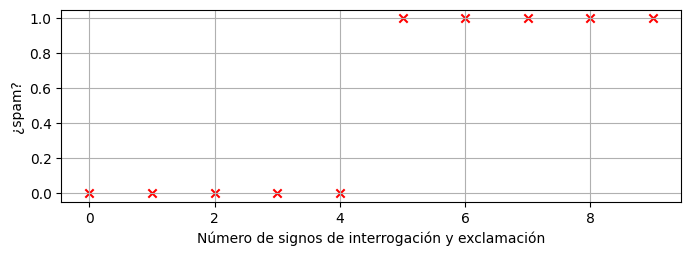

In [9]:
import numpy as np
import matplotlib.pyplot as plt

x = [i for i in range(10)]
y = [0,0,0,0,0,1,1,1,1,1]

plt.figure(figsize=(8, 2.5))
plt.scatter(x, y,marker='x', color='red')
plt.xlabel('Número de signos de interrogación y exclamación')
plt.ylabel('¿spam?')
plt.grid()
plt.show()

Por ejemplo en el iagrama e arriba como se ve su un correo es spam o no es spam dependiendo de la cantidad de numeros de signos que tenga el correo.
$$
y \in \{0,1\}\\
0 \rightarrow clase Negativa\\
1 \rightarrow clase Positiva 
$$

Si caen en el lado donde no se categoriza el spam pues no es spam, pero al caer en al zona categorizada de spam pues se categoriza como spam. Por eso volvemos a usar la funcion hipotesis.
$$ h_\theta(x) = \theta_{0} + \theta_{1}(x) $$
La respuesta son valores continuos pero no nos sirve del todo porque nos funcionan son valores discretos y por eso se tienen que acomodar rangos de funcion o threshol o limite. Por el momento no parece que se necesite otro tipo de funcion, pero se necesitan ajustar parametros para la tenencia al conjunto de datos. Al haber valores muy alejados de los valores de entrenamiento que se esperaban la tendencia tirara hacia esos valores alejados y por eso el threshold no es el mismo y cambia dañando la tenencia en la funcion hipotesis, al realizar una pridiccion cambia y puede ser erroneo.
$$0 \leqslant h_{\theta}(x) \leqslant 1$$
$$h_{\theta}(x) = g(\theta_{0}+\theta_{1}(x))$$
### REGRESION LOGISTICA | **Funcion Sigmoide**
$$g(z) = \frac{1}{1 - e^{-z}} \rightarrow g(x) = \frac{1}{1 - e^{\theta_{0}+\theta_{1}(x)}}$$
Es la funcion hipotesis para este estilo de regresion.

![sigmoide](./Images/sigmoide.png)

$\theta_{0}(x)$ = probabilidad de que y = 1 para cada entrada  x.
$$P(y = 0) + P(y = 1) = 1 \rightarrow P(y = 0) = 1 - P(y = 1) = 1 - h_{\theta}(x)$$
Una funcion treshold. 
$$
y = 1 ,si- h_{\theta}(x) \geqslant 0.5\\
y = 0 ,si- h_{\theta}(x) < 0.5
$$
Con esta propiedad de la funcion sigmoide se puede modelar mas correctamente las predicciones que se requieren y representarlo de una manera mas compleja y correcta a las necesidades.

### REGRESION LOGISTICA | **Funcion de Coste**

No puede utilizarse la misma funcion de coste que se utiliza para la regresion lineal debido a que, aplicada a la regresion logistica, **genera optimos locales**. La regresion logistica debe trabajar con **optimos globales**.

![punto local y global](./Images/globalYlocal.jpg)

No se puede usar la funcion de coste de la funcion pasaa porque no optimiza el punto de ajuste optimo sino varios y provocaria el error.

*¿Entonces que funcion de coste nos sirve?*

Una funcion donde una mala prediccion el coste sea alto y una buena prediccion sea el coste bajo. Para ello se utiliza el mismo modelo en que se tenia el _threshold_. 

> Si nuestra respuesta correcta 'y' es 0, entonces la funcion de coste sera 0 si nuestra funcion de hipotesis tambien emite un 0. Si nuestra hipotesis se acerca a 1, entonces la funcion de coste se aproxima al infinito. Y lo mismo si 'y' es 1.

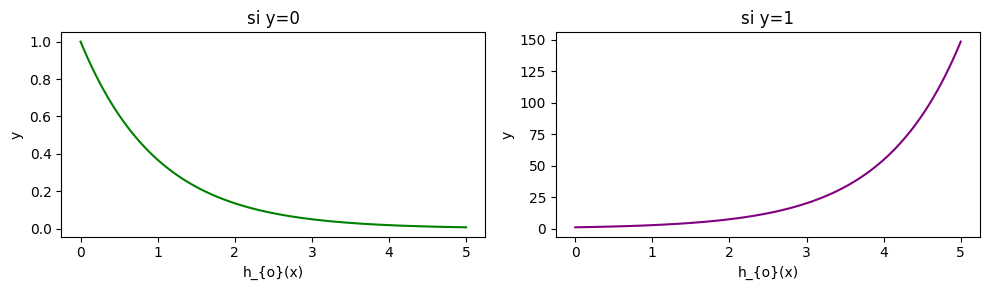

In [4]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

fig, axs = plt.subplots(1, 2, figsize=(10, 3))

x = np.linspace(0, 5, 100)

# Exponencial decreciente
axs[0].plot(x, np.exp(-x), color='green')
axs[0].set_title('si y=0')
axs[0].set_xlabel('h_{o}(x)')
axs[0].set_ylabel('y')

# Exponencial creciente
axs[1].plot(x, np.exp(x), color='purple')
axs[1].set_title('si y=1')
axs[1].set_xlabel('h_{o}(x)')
axs[1].set_ylabel('y')

plt.tight_layout()
plt.show()

*Funcion de coste J($\theta$)*

$$ 
y=1, J(H_{\theta}(x),y) = -log({H_{\theta}}(x))\\
y=0, J(H_{\theta}(x),y) = -log({1-H_{\theta}}(x))\\
J(H_{\theta}(x),y) = -ylog(H_{\theta}(x)) - (1-y)log(1-H_{\theta}(x))\\
$$
Si cambiamos las variables con los valores entonces:
$$
y=1, J(H_{\theta}(x),1) = -1log(H_{\theta}(x)) - (1-1)log(1-H_{\theta}(x)) = -log(H_{\theta}(x))\\
y=0, J(H_{\theta}(x),0) = -0log(H_{\theta}(x)) - (1-0)log(1-H_{\theta}(x)) = -log(1-H_{\theta}(x))\\
$$
Entonces la funcion de coste J es la optima para la regresion logistica.

### REGRESION LOGISTICA | **Gradient Descent**
$J(H_{\theta}(x),y) = -ylog(H_{\theta}(x)) - (1-y)log(1-H_{\theta}(x))$

Se lleva a la misma funcion y en este caso se implementa con el mismo ejemplo que se ha estado haciendo con los mails y los signos que tenga.

$(x_1,x_2,y) \rightarrow H_{\theta}(x) = g(\theta_0 + \theta_1 x1 + \theta_2 x2)$

Y para llevar al gradient descent se hace una derivada parcial para entrar en la velocidad de optimizacion en cada punto.

$$
\theta_0 = \theta_0 - \alpha \frac{\partial}{\partial \theta_0} = \theta_0 - \alpha (H_{\theta}(x)-y)\\
\theta_1 = \theta_1 - \alpha \frac{\partial}{\partial \theta_1} = \theta_1 - \alpha (x_1 (H_{\theta}(x)-y))\\
\theta_2 = \theta_2 - \alpha \frac{\partial}{\partial \theta_2} = \theta_2 - \alpha (x_2 (H_{\theta}(x)-y))\\
$$

Despues de esto se itera y se llega a los valores optimos del modelo.

# CLASIFICACION DENTRO DE LA CIBERSEGURIDAD
Un profesional de la seguridad de la información realiza constantemente procesos de clasificación: 
* Para cada correo electrónico, ¿el correo es phishing? 
* Para un fichero enviado a través de la red, ¿el fichero contiene malware? 
* Para cada petición hacia el exterior, ¿la petición es una llamada a un C&C? 
* Para cada transacción, ¿se trata de una transacción fraudulenta? 
* Para cada petición entrante a la red, ¿la petición forma parte de un DOS? 

El conjunto de sucesos anteriores solo es una pequeña parte de todos los que se deben revisar de manera constante para mantener un nivel de seguridad adecuado 

¿Cómo pueden clasificarse un número tan elevado de eventos?

## La importancia de los datos 
Las organizaciones implementan diversos procesos de recolección de datos, como logs o eventos 

El procesamiento de estos datos no requiere necesariamente técnicas de Machine Learning 

* Ejemplo: Se desean identificar los ataques de fuerza bruta sobre los paneles de autenticación de un conjunto de aplicaciones web de una organización 
    * Se comprueban los logs de ataques de fuerza bruta que ocurrieron en el pasado 
    * El analista descubre un patrón en los datos, en todos los ataques pasados se han realizado más de 10 peticiones desde la misma IP en menos de 1 minuto 
    * Se programa un algoritmo que implemente la siguiente heurística, si se realizan más de 10 peticiones desde la misma IP en menos de un minuto, se bloquea la dirección  
    * Este algoritmo obtenido a través de la interpretación de los datos sería capaz de bloquear los ataques de fuerza bruta, pero, ¿por qué se han elegido 10 peticiones y 1 minuto como límite?, ¿por qué no elegir 11 peticiones y 2 minutos?, ¿qué ocurre si los ataques cambian?

## Clasificación y Ciberseguridad 
* En el ejemplo anterior, probablemente el analista haya utilizado algún tipo de intuición basada en la experiencia para determinar que "10" era el número de peticiones óptimas y "1" el tiempo óptimo 
* Machine Learning consiste en utilizar algoritmos que procesan el *histórico de datos* e *infieren las reglas de clasificación* que se consideran *óptimas* de acuerdo con un conjunto de principios matemáticos

<img src="Images/clafsec.png" alt="Clasificación en ciberseguridad" width="350"/>

Dentro de esta area, hay muchos problemas de clasificacion y ahi es donde toca clasificar y desidir y una herramienta muy valiosa es el machine learning, muchas veces no sera util usar ia o machine learning, pero pueden ayudar como herramienta que infiera un proceso de desicion de analista.

# COUNT VECTORIZER
CountVectorizer es una técnica utilizada en procesamiento de lenguaje natural (NLP) para convertir texto en una representación numérica que pueda ser utilizada por algoritmos de Machine Learning.  
Su funcionamiento consiste en transformar un conjunto de documentos en una matriz de conteo de palabras, donde cada columna representa una palabra única del vocabulario y cada fila representa un documento. El valor en cada celda indica cuántas veces aparece esa palabra en el documento correspondiente.

**Ventajas:**
- Permite trabajar con texto de manera sencilla y eficiente.
- Es la base para muchos modelos de clasificación y análisis de texto.

**Limitaciones:**
- No tiene en cuenta el significado o contexto de las palabras.
- Las palabras muy frecuentes pueden dominar la representación (por eso a veces se usa TF-IDF).

**Ejemplo de uso en Python:**
```python
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    "El correo es spam",
    "Este correo no es spam",
    "¿Es spam o no?"
]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())
print(X.toarray())
```
Esto genera una matriz donde cada columna es una palabra y cada fila corresponde a un documento del corpus.

email1 $\rightarrow$ ["hola", "tal", "estas", "adios"]

email2 $\rightarrow$ ["hola", "llamo", "santi", "adios"]

Esta son listas de palabras y se deben representar en vectores, para cada una de las palabras, el count vectorizer contara aquellas palabras y verificar que no se repitan, numerando cada palabra que no se repite en un conjunto de datos.

# ONE HOT ENCODING

One Hot Encoding es una técnica utilizada para convertir variables categóricas en una representación numérica que pueda ser utilizada por algoritmos de Machine Learning.  
Consiste en crear una columna para cada categoría posible y asignar un valor de 1 en la columna correspondiente a la categoría presente y 0 en las demás.

Por ejemplo, si tenemos la variable "color" con los valores ["rojo", "verde", "azul"], la representación One Hot sería:

| color_rojo | color_verde | color_azul |
|------------|-------------|------------|
|     1      |      0      |     0      |
|     0      |      1      |     0      |
|     0      |      0      |     1      |

**Ventajas:**
- Permite trabajar con variables categóricas sin introducir un orden artificial.
- Es compatible con la mayoría de los algoritmos de Machine Learning.

**Limitaciones:**
- Puede aumentar significativamente el número de columnas si hay muchas categorías.
- No captura relaciones entre categorías.

En Python, se puede aplicar fácilmente usando `pandas.get_dummies()` o `OneHotEncoder` de `sklearn`.